In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [4]:
list1=['Unnamed: 32','id','diagnosis']
X=data.drop(list1,axis = 1)
y=data.diagnosis

X.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
print(X.ndim)
print(y.ndim)

2
1


In [6]:
y.replace(["M","B"],[1,0], inplace = True)

/tmp/ipykernel_18/290169031.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace(["M","B"],[1,0], inplace = True)


In [7]:
y.values.reshape(-1,1)
print(y.ndim)
y.shape

1


(569,)

In [8]:
y.replace(["M","B"],[1,0], inplace = True)
y.values.reshape(-1,1)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [9]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#y_scaled = scaler.fit_transform(y)

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

k_values = [1, 3, 5, 7, 9, 11, 15, 20]
auc_means = []
for k in [1,3,5,7,9,11,15,20]:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')  # weighted KNN
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='roc_auc')
    print(f"k={k}, AUC={np.mean(scores):.4f}")


k=1, AUC=0.9463
k=3, AUC=0.9845
k=5, AUC=0.9916
k=7, AUC=0.9911
k=9, AUC=0.9906
k=11, AUC=0.9917
k=15, AUC=0.9927
k=20, AUC=0.9915


In [11]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15,17, 19,21]
auc_means = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='roc_auc')
    auc_means.append(np.mean(scores))
    print(f"k={k}, mean AUC={np.mean(scores):.4f}")



k=1, mean AUC=0.9463
k=3, mean AUC=0.9845
k=5, mean AUC=0.9916
k=7, mean AUC=0.9911
k=9, mean AUC=0.9906
k=11, mean AUC=0.9917
k=13, mean AUC=0.9930
k=15, mean AUC=0.9927
k=17, mean AUC=0.9921
k=19, mean AUC=0.9918
k=21, mean AUC=0.9914


In [12]:
# Split the data into training and testing sets
train_mask, test_mask = train_test_split(np.arange(len(y)), test_size=0.2, random_state=42)

Generate graph based on KNN using features similarity of nearest 5 neighbours. Here nodes are data points and edges based on feature similarity for k=5

In [13]:
import torch

print("torch version: ", torch.__version__)

torch version:  2.1.2+cpu


In [14]:
pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
import torch
import torch_geometric
from torch_geometric.data import Data
from sklearn.neighbors import kneighbors_graph
import torch.optim as optim

In [16]:
# Create k-nearest neighbors graph
k = 5
adj_matrix = kneighbors_graph(X_scaled, k, mode='connectivity', include_self=True)
edge_index = np.array(adj_matrix.nonzero())

In [17]:
# Convert to PyTorch tensors
x = torch.tensor(X_scaled, dtype=torch.float)
y = torch.tensor(y, dtype=torch.long)
edge_index = torch.tensor(edge_index, dtype=torch.long)

In [18]:
# Create PyTorch Geometric data object
data = Data(x=x, edge_index=edge_index, y=y)
data.train_mask = torch.tensor(np.isin(np.arange(len(y)), train_mask), dtype=torch.bool)
data.test_mask = torch.tensor(np.isin(np.arange(len(y)), test_mask), dtype=torch.bool)

In [19]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from sklearn. metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Instantiate the model
model = GCN(in_channels=X.shape[1], hidden_channels=16, out_channels=2)


model.train()

# After training your GNN:
model.eval()
out = model(data)

# Predictions
y_pred = out.argmax(dim=1).cpu().numpy()
y_true = data.y.cpu().numpy()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

Confusion Matrix:
 [[156 201]
 [ 22 190]]
Precision: 0.4859
Recall:    0.8962
F1-score:  0.6302


#plot loss curve

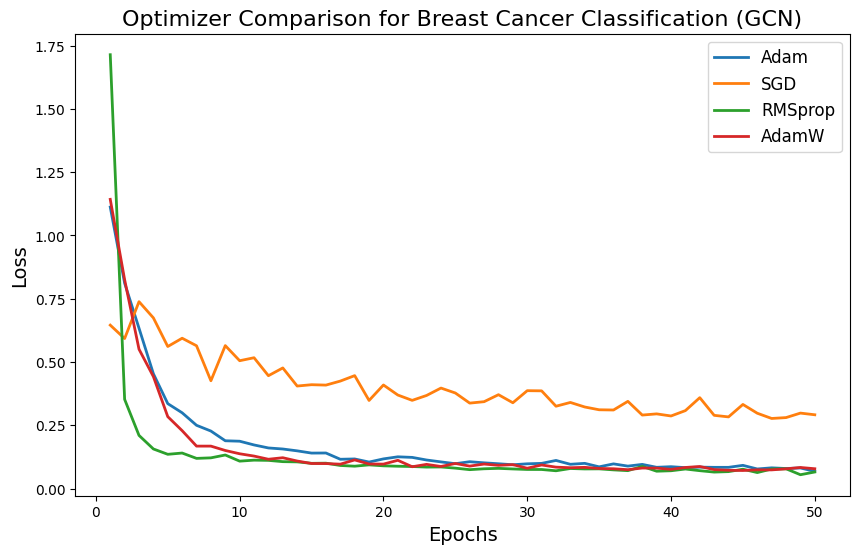

In [21]:
import torch.nn as nn
import torch. optim as optim
import matplotlib.pyplot as plt

# Dummy Data (Replace with actual dataset)
torch.manual_seed(42)
X = torch.rand(100, 30)  # 100 samples, 30 features
y = torch.randint(0, 2, (100,))  # Binary classification (0 or 1)

# Loss function
criterion = nn.CrossEntropyLoss()


# Optimizers to compare
optimizers = {
    "Adam": optim.Adam,
    "SGD": optim.SGD,
    "RMSprop": optim.RMSprop,
    "AdamW": optim.AdamW
}

results = {"Epoch": list(range(1, 51))}  # Dictionary to store loss values

# Train each optimizer
for opt_name, opt_func in optimizers.items():
    model = GCN(30, 16, 2)  # Initialize model
    optimizer = opt_func(model.parameters(), lr=0.01)  # Set optimizer

    losses = []
    for epoch in range(50):  # Train for 50 epochs
        optimizer.zero_grad()
        outputs = model(data)
        loss =  F.nll_loss(outputs[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    results[opt_name] = losses  # Store loss history

# Convert results to Pandas DataFrame
df = pd.DataFrame(results)

# Plot Loss Curves
plt.figure(figsize=(10, 6))
#sns.set_style("whitegrid")

for opt_name in optimizers.keys():
    plt.plot(df["Epoch"], df[opt_name], label=opt_name, linewidth=2)

plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.title("Optimizer Comparison for Breast Cancer Classification (GCN)", fontsize=16)
plt.legend(fontsize=12)
plt.show()

#plot AUC-ROC curve

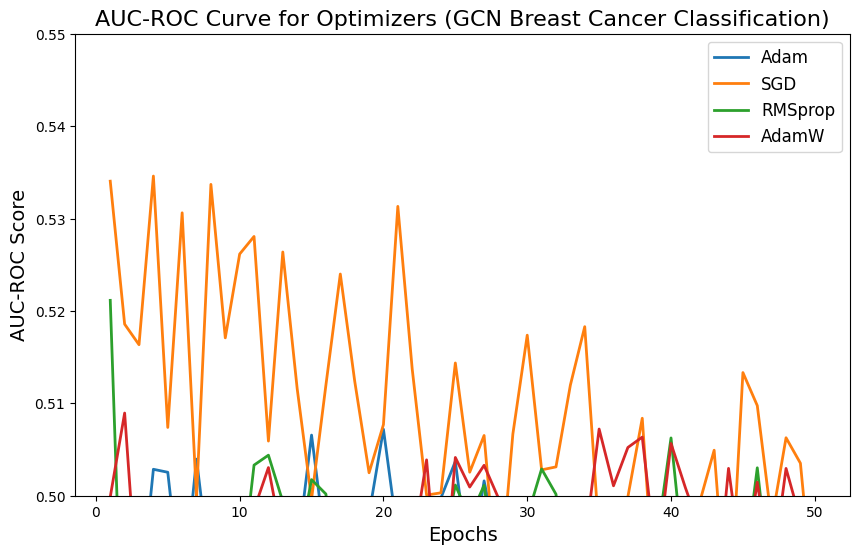

In [22]:
import torch.nn as nn
from sklearn.metrics import roc_auc_score, confusion_matrix

# Dummy Data (Replace with actual dataset)
torch.manual_seed(42)
X = torch.rand(569, 30)  # 100 samples, 30 features
y = torch.randint(0, 2, (569,))  # Binary classification (0 or 1)

# Loss function
criterion = nn.CrossEntropyLoss()


# Optimizers to compare
optimizers = {
    "Adam": optim.Adam,
    "SGD": optim.SGD,
    "RMSprop": optim.RMSprop,
    "AdamW": optim.AdamW
}

results = {"Epoch": list(range(1, 51))}  # Dictionary to store loss values
auc_scores = {opt_name: [] for opt_name in optimizers}  # Store AUC scores

# Train each optimizer
for opt_name, opt_func in optimizers.items():
    model = GCN(30, 16, 2)  # Initialize model
    optimizer = opt_func(model.parameters(), lr=0.01)  # Set optimizer

    losses = []
    for epoch in range(50):  # Train for 50 epochs
        optimizer.zero_grad()
        outputs = model(data)
        loss =  F.nll_loss(outputs[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()
        
# Compute AUC-ROC score
        probs = torch.softmax(outputs, dim=1)[:, 1].detach().numpy()  # Get probabilities for class 1
        auc = roc_auc_score(y.numpy(), probs)  # Compute AUC
        auc_scores[opt_name].append(auc)  # Store AUC


# Convert AUC scores to DataFrame
df_auc = pd.DataFrame({"Epoch": list(range(1, 51)), **auc_scores})

# Plot AUC-ROC Curves
plt.figure(figsize=(10, 6))
 #sns.set_style("whitegrid")

for opt_name in optimizers.keys():
    plt.plot(df_auc["Epoch"], df_auc[opt_name], label=opt_name, linewidth=2)

plt.xlabel("Epochs", fontsize=14)
plt.ylabel("AUC-ROC Score", fontsize=14)
plt.title("AUC-ROC Curve for Optimizers (GCN Breast Cancer Classification)", fontsize=16)
plt.legend(fontsize=12)
plt.ylim(0.5, 0.55)  # AUC score ranges from 0.5 (random) to 1.0 (perfect)
plt.show()


#compared using various learning rate and batch size

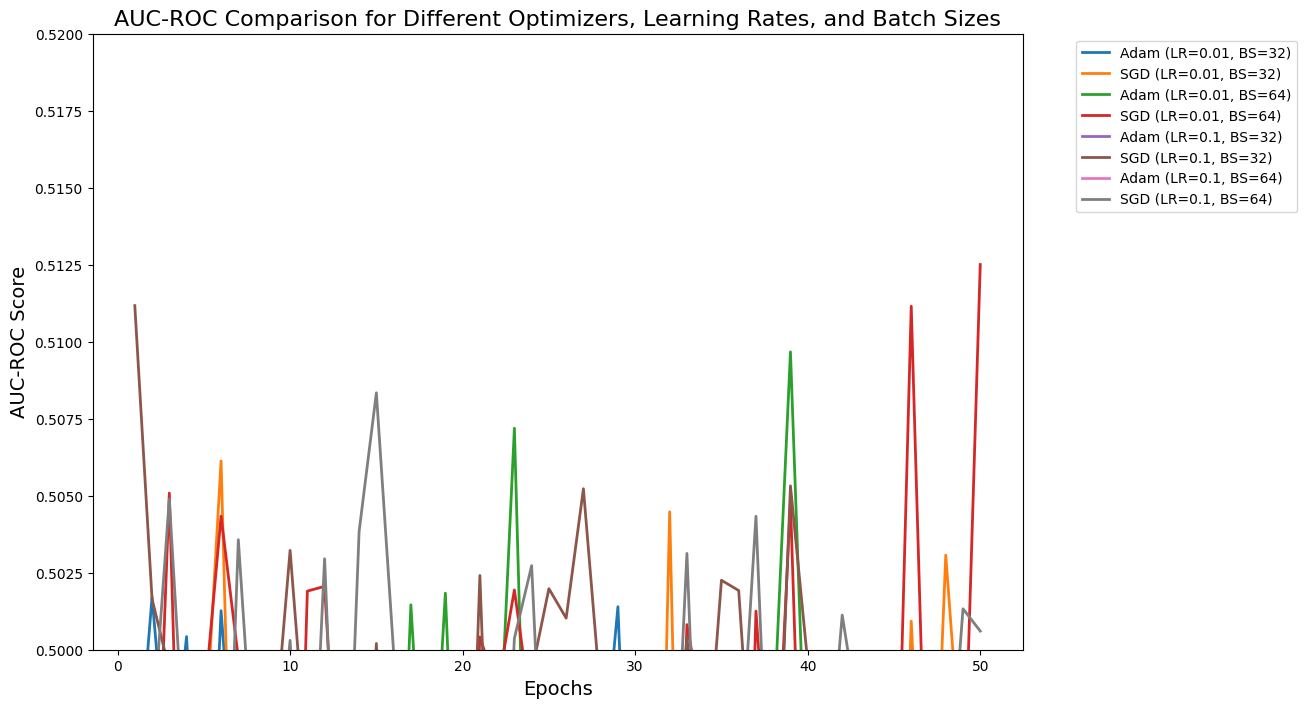

In [23]:
import torch.nn as nn
from sklearn.metrics import roc_auc_score
from torch.utils.data import DataLoader, TensorDataset

# Dummy Data (Replace with actual dataset)
torch.manual_seed(42)
X = torch.rand(569, 30)  # 100 samples, 30 features
y = torch.randint(0, 2, (569,))  # Binary classification (0 or 1)

# Convert to Tensor Dataset
dataset = TensorDataset(X, y)

# Loss function
criterion = nn.CrossEntropyLoss()
# Hyperparameters to test
#learning_rates = [0.001, 0.01, 0.1]
#batch_sizes = [16, 32, 64]

learning_rates = [ 0.01, 0.1]
batch_sizes = [ 32, 64]

# Optimizers to compare
optimizers = {
    "Adam": optim.Adam,
    "SGD": optim.SGD,
    #"RMSprop": optim.RMSprop
}

# Store results
results = []

# Loop over learning rates and batch sizes
for lr in learning_rates:
    for batch_size in batch_sizes:
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)  # Load data in batches

        for opt_name, opt_func in optimizers.items():
            model = GCN(30, 16, 2)  # Initialize model
            optimizer = opt_func(model.parameters(), lr=lr)  # Set optimizer
            criterion = nn.CrossEntropyLoss()

            auc_scores = []
            for epoch in range(50):  # Train for 50 epochs
                for batch_X, batch_y in dataloader:
                    optimizer.zero_grad()
                    outputs = model(data)
                    loss =  F.nll_loss(outputs[data.train_mask], data.y[data.train_mask])
                    loss.backward()
                    optimizer.step()
                
                # Compute AUC-ROC score
                with torch.no_grad():
                    all_outputs = model(data)
                    probs = torch.softmax(all_outputs, dim=1)[:, 1].numpy()
                    auc = roc_auc_score(y.numpy(), probs)
                    auc_scores.append(auc)

            results.append({
                "Optimizer": opt_name,
                "Learning Rate": lr,
                "Batch Size": batch_size,
                "AUC Scores": auc_scores
            })

# Plot AUC-ROC for different learning rates and batch sizes
plt.figure(figsize=(12, 8))
#sns.set_style("whitegrid")

for result in results:
    label = f"{result['Optimizer']} (LR={result['Learning Rate']}, BS={result['Batch Size']})"
    plt.plot(range(1, 51), result["AUC Scores"], label=label, linewidth=2)

plt.xlabel("Epochs", fontsize=14)
plt.ylabel("AUC-ROC Score", fontsize=14)
plt.title("AUC-ROC Comparison for Different Optimizers, Learning Rates, and Batch Sizes", fontsize=16)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0.5, 0.52)  # AUC score range
plt.show()

In [24]:
import torch.optim as optim

#AdamW optimizer

In [25]:
# Define optimizer and loss function
optimizer = optim.AdamW(model.parameters(), lr=0.005, weight_decay=1e-2)

# Training function
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Test function
def test():
    model.eval()
    _, pred = model(data).max(dim=1)
    correct = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item()
    acc = correct / data.test_mask.sum().item()
    return acc

# Training loop
for epoch in range(200):
    loss = train()
    if epoch % 10 == 0:
        acc = test()
        print(f'Epoch {epoch}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}')

Epoch 0, Loss: 0.0617, Test Accuracy: 0.9561
Epoch 10, Loss: 0.0620, Test Accuracy: 0.9649
Epoch 20, Loss: 0.0518, Test Accuracy: 0.9561
Epoch 30, Loss: 0.0468, Test Accuracy: 0.9386
Epoch 40, Loss: 0.0502, Test Accuracy: 0.9561
Epoch 50, Loss: 0.0543, Test Accuracy: 0.9474
Epoch 60, Loss: 0.0406, Test Accuracy: 0.9474
Epoch 70, Loss: 0.0392, Test Accuracy: 0.9474
Epoch 80, Loss: 0.0472, Test Accuracy: 0.9474
Epoch 90, Loss: 0.0517, Test Accuracy: 0.9474
Epoch 100, Loss: 0.0399, Test Accuracy: 0.9474
Epoch 110, Loss: 0.0371, Test Accuracy: 0.9474
Epoch 120, Loss: 0.0427, Test Accuracy: 0.9474
Epoch 130, Loss: 0.0516, Test Accuracy: 0.9561
Epoch 140, Loss: 0.0433, Test Accuracy: 0.9474
Epoch 150, Loss: 0.0345, Test Accuracy: 0.9561
Epoch 160, Loss: 0.0385, Test Accuracy: 0.9561
Epoch 170, Loss: 0.0327, Test Accuracy: 0.9474
Epoch 180, Loss: 0.0425, Test Accuracy: 0.9474
Epoch 190, Loss: 0.0411, Test Accuracy: 0.9474


#Adagrad optimizer

In [26]:
# Define optimizer and loss function
optimizer =  torch.optim.Adagrad(model.parameters(), lr=0.01)

# Training function
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Test function
def test():
    model.eval()
    _, pred = model(data).max(dim=1)
    correct = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item()
    acc = correct / data.test_mask.sum().item()
    return acc

# Training loop
for epoch in range(200):
    loss = train()
    if epoch % 10 == 0:
        acc = test()
        print(f'Epoch {epoch}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}')

Epoch 0, Loss: 0.0440, Test Accuracy: 0.9474
Epoch 10, Loss: 0.0417, Test Accuracy: 0.9561
Epoch 20, Loss: 0.0315, Test Accuracy: 0.9561
Epoch 30, Loss: 0.0493, Test Accuracy: 0.9561
Epoch 40, Loss: 0.0276, Test Accuracy: 0.9561
Epoch 50, Loss: 0.0332, Test Accuracy: 0.9561
Epoch 60, Loss: 0.0370, Test Accuracy: 0.9561
Epoch 70, Loss: 0.0360, Test Accuracy: 0.9561
Epoch 80, Loss: 0.0276, Test Accuracy: 0.9561
Epoch 90, Loss: 0.0433, Test Accuracy: 0.9561
Epoch 100, Loss: 0.0288, Test Accuracy: 0.9561
Epoch 110, Loss: 0.0342, Test Accuracy: 0.9561
Epoch 120, Loss: 0.0370, Test Accuracy: 0.9561
Epoch 130, Loss: 0.0350, Test Accuracy: 0.9561
Epoch 140, Loss: 0.0360, Test Accuracy: 0.9561
Epoch 150, Loss: 0.0371, Test Accuracy: 0.9561
Epoch 160, Loss: 0.0337, Test Accuracy: 0.9561
Epoch 170, Loss: 0.0287, Test Accuracy: 0.9561
Epoch 180, Loss: 0.0358, Test Accuracy: 0.9561
Epoch 190, Loss: 0.0353, Test Accuracy: 0.9561


#SGD optimizer

In [27]:
# Define optimizer and loss function
optimizer =  torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training function
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Test function
def test():
    model.eval()
    _, pred = model(data).max(dim=1)
    correct = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item()
    acc = correct / data.test_mask.sum().item()
    return acc

# Training loop
for epoch in range(200):
    loss = train()
    if epoch % 10 == 0:
        acc = test()
        print(f'Epoch {epoch}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}')

Epoch 0, Loss: 0.0385, Test Accuracy: 0.9561
Epoch 10, Loss: 0.0348, Test Accuracy: 0.9561
Epoch 20, Loss: 0.0341, Test Accuracy: 0.9561
Epoch 30, Loss: 0.0290, Test Accuracy: 0.9561
Epoch 40, Loss: 0.0246, Test Accuracy: 0.9561
Epoch 50, Loss: 0.0403, Test Accuracy: 0.9561
Epoch 60, Loss: 0.0335, Test Accuracy: 0.9561
Epoch 70, Loss: 0.0257, Test Accuracy: 0.9561
Epoch 80, Loss: 0.0270, Test Accuracy: 0.9561
Epoch 90, Loss: 0.0318, Test Accuracy: 0.9561
Epoch 100, Loss: 0.0333, Test Accuracy: 0.9561
Epoch 110, Loss: 0.0374, Test Accuracy: 0.9561
Epoch 120, Loss: 0.0335, Test Accuracy: 0.9561
Epoch 130, Loss: 0.0274, Test Accuracy: 0.9561
Epoch 140, Loss: 0.0331, Test Accuracy: 0.9561
Epoch 150, Loss: 0.0285, Test Accuracy: 0.9561
Epoch 160, Loss: 0.0315, Test Accuracy: 0.9561
Epoch 170, Loss: 0.0420, Test Accuracy: 0.9561
Epoch 180, Loss: 0.0320, Test Accuracy: 0.9561
Epoch 190, Loss: 0.0293, Test Accuracy: 0.9561


#RMSProp optimizer

In [28]:
# Define optimizer and loss function
optimizer =  torch.optim.RMSprop(model.parameters(), lr=0.01, weight_decay=1e-4)

# Training function
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Test function
def test():
    model.eval()
    _, pred = model(data).max(dim=1)
    correct = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item()
    acc = correct / data.test_mask.sum().item()
    return acc

# Training loop
for epoch in range(200):
    loss = train()
    if epoch % 10 == 0:
        acc = test()
        print(f'Epoch {epoch}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}')

Epoch 0, Loss: 0.0284, Test Accuracy: 0.9649
Epoch 10, Loss: 0.0404, Test Accuracy: 0.9474
Epoch 20, Loss: 0.0381, Test Accuracy: 0.9561
Epoch 30, Loss: 0.0353, Test Accuracy: 0.9386
Epoch 40, Loss: 0.0371, Test Accuracy: 0.9561
Epoch 50, Loss: 0.0417, Test Accuracy: 0.9561
Epoch 60, Loss: 0.0285, Test Accuracy: 0.9561
Epoch 70, Loss: 0.0339, Test Accuracy: 0.9561
Epoch 80, Loss: 0.0373, Test Accuracy: 0.9561
Epoch 90, Loss: 0.0280, Test Accuracy: 0.9561
Epoch 100, Loss: 0.0381, Test Accuracy: 0.9474
Epoch 110, Loss: 0.0312, Test Accuracy: 0.9474
Epoch 120, Loss: 0.0259, Test Accuracy: 0.9561
Epoch 130, Loss: 0.0286, Test Accuracy: 0.9561
Epoch 140, Loss: 0.0278, Test Accuracy: 0.9561
Epoch 150, Loss: 0.0235, Test Accuracy: 0.9561
Epoch 160, Loss: 0.0273, Test Accuracy: 0.9561
Epoch 170, Loss: 0.0259, Test Accuracy: 0.9561
Epoch 180, Loss: 0.0274, Test Accuracy: 0.9561
Epoch 190, Loss: 0.0374, Test Accuracy: 0.9561


#Adam optimizer

In [29]:
# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Training function
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Test function
def test():
    model.eval()
    _, pred = model(data).max(dim=1)
    correct = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item()
    acc = correct / data.test_mask.sum().item()
    return acc

# Training loop
for epoch in range(200):
    loss = train()
    if epoch % 10 == 0:
        acc = test()
        print(f'Epoch {epoch}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}')

Epoch 0, Loss: 0.0402, Test Accuracy: 0.9561
Epoch 10, Loss: 0.0250, Test Accuracy: 0.9561
Epoch 20, Loss: 0.0334, Test Accuracy: 0.9561
Epoch 30, Loss: 0.0329, Test Accuracy: 0.9561
Epoch 40, Loss: 0.0397, Test Accuracy: 0.9561
Epoch 50, Loss: 0.0278, Test Accuracy: 0.9474
Epoch 60, Loss: 0.0254, Test Accuracy: 0.9561
Epoch 70, Loss: 0.0264, Test Accuracy: 0.9561
Epoch 80, Loss: 0.0323, Test Accuracy: 0.9561
Epoch 90, Loss: 0.0390, Test Accuracy: 0.9561
Epoch 100, Loss: 0.0335, Test Accuracy: 0.9561
Epoch 110, Loss: 0.0249, Test Accuracy: 0.9561
Epoch 120, Loss: 0.0316, Test Accuracy: 0.9561
Epoch 130, Loss: 0.0361, Test Accuracy: 0.9561
Epoch 140, Loss: 0.0259, Test Accuracy: 0.9561
Epoch 150, Loss: 0.0206, Test Accuracy: 0.9561
Epoch 160, Loss: 0.0281, Test Accuracy: 0.9561
Epoch 170, Loss: 0.0235, Test Accuracy: 0.9474
Epoch 180, Loss: 0.0276, Test Accuracy: 0.9474
Epoch 190, Loss: 0.0320, Test Accuracy: 0.9474


In [30]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

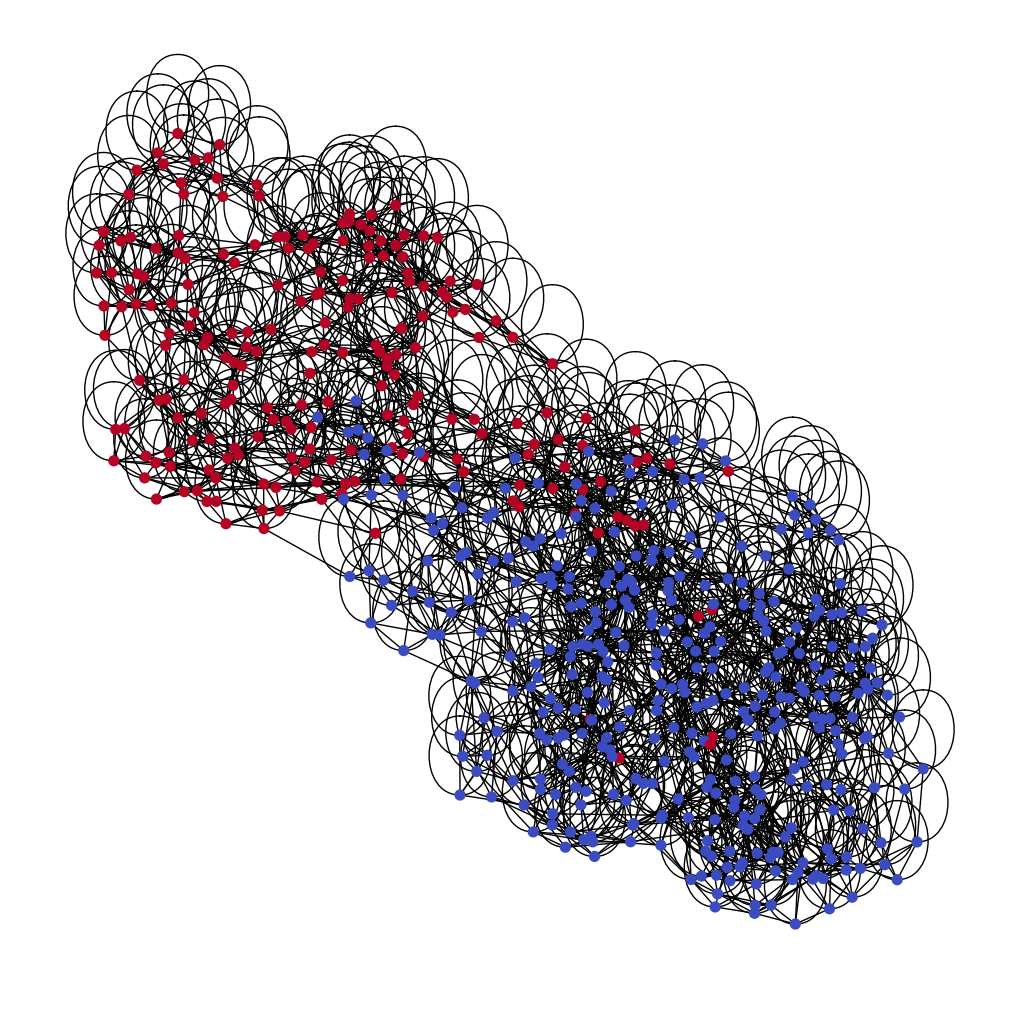

In [31]:

# Convert PyTorch Geometric data to NetworkX graph
G = to_networkx(data, to_undirected=True)

# Draw the graph
plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G, seed=42)  # Position nodes using spring layout
nx.draw(G, pos, node_color=data.y, cmap='coolwarm', node_size=50, with_labels=False)

plt.show()